In [5]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-dimreduce-hello)

We make an image from some text, then reload it as a matrix.

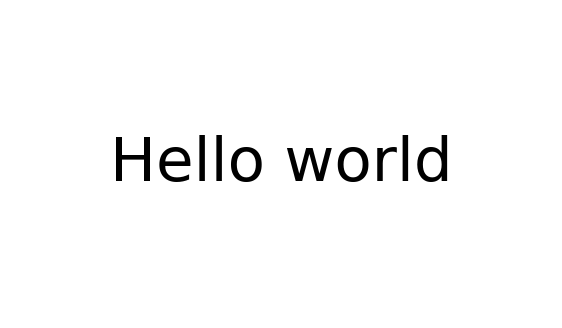

In [6]:
text(
    0.5,
    0.5,
    "Hello world",
    dict(fontsize=44),
    horizontalalignment="center",
    verticalalignment="center",
)
axis("off")
savefig("hello.png")

In [7]:
from skimage.io import imread
from skimage.color import rgb2gray
img = imread("hello.png")[:, :, :3]
A = rgb2gray(img)
print(f"image of size {A.shape}")

image of size (400, 700)


Next we show that the singular values decrease until they reach zero (more precisely, until they are about $\epsilon_\text{mach}$ times the norm of the matrix) at around index $38$.

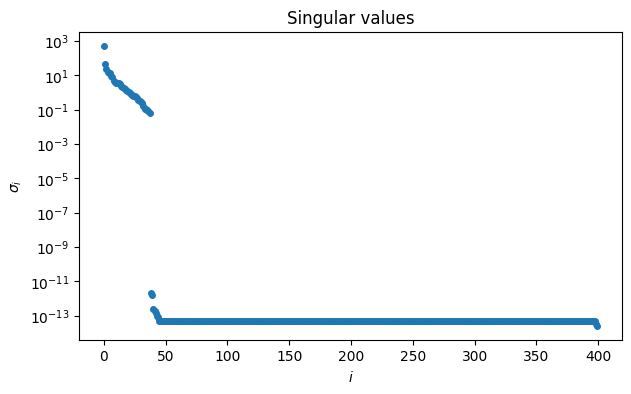

In [8]:
from numpy.linalg import svd
U, sigma, Vt = svd(A)
semilogy(sigma, "o")
title("Singular values")
xlabel("$i$"), ylabel("$\\sigma_i$");

In [9]:
significant = sigma / sigma[0] > 10 * 2**-52
print(f"last significant singular value at index {max(where(significant)[0])}")

last significant singular value at index 39


The rapid decrease suggests that we can get fairly good low-rank approximations.

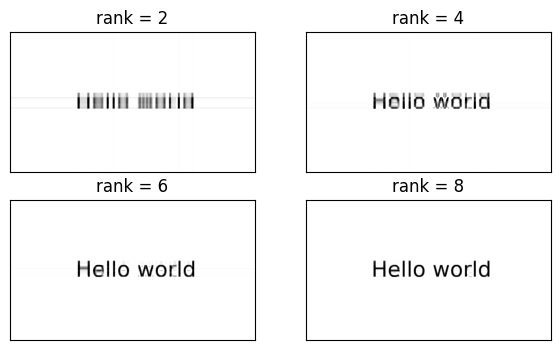

In [10]:
for k in range(4):
    r = 2 + 2 * k
    Ak = U[:, :r] @ diag(sigma[:r]) @ Vt[:r, :]
    subplot(2, 2, k + 1)
    imshow(Ak, cmap="gray", clim=(0.0, 1.0))
    title(f"rank = {r}")
    xticks([]), yticks([])

Consider how little data is needed to reconstruct these images. For rank-8, for instance, we have 8 left and right singular vectors plus 8 singular values.

In [11]:
m, n = A.shape
full_size = m * n
compressed_size = 8 * (m + n + 1)
print(f"compression ratio: {full_size / compressed_size:.1f}")

compression ratio: 31.8
